## **Workshop in CS240**

---

Exploratory Data Analysis (EDA) on Titanic Dataset

In [ ]:
# Load libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Data Acquisition

In [ ]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read data
Titanic_data = pd.read_csv('/content/drive/MyDrive/Lecture/CS245/Datasets/Titanic.csv')

In [ ]:
# View first five rows of the dataset
Titanic_data.head()

,index,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Fetch the dimensions of data
Titanic_data.shape

(891, 16)

**Data Description**
* index: Passecger index
* survived: Survival status (0 = No, 1 = Yes)
* pclass: Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
* sex: Passenger’s gender
* age: Passenger’s age
* sibsp: Number of siblings/spouses aboard
* parch: Number of parents/children aboard
* fare: Fare paid for the ticket
* embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
* class: Equivalent to Pclass (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
* who: Passenger’s category (man, woman, child)
* adult_male: Whether the passenger is an adult male or not (True or False)
* deck: Cabin deck
* embark_town: Port of embarkation (Cherbourg, Queenstown, Southampton)
* alive: Survival status (yes or no)
* alone: Whether the passenger is alone or not (True or False)


# Data Preparation

In [ ]:
# Drop column 'index' (There is no meaning!)
Titanic_cleaned = Titanic_data.iloc[:,1:]

In [ ]:
Titanic_cleaned.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Checking and handling duplicate data

In [ ]:
# To check the number of duplicate values
Titanic_cleaned.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,True
887,False
888,False
889,False


In [ ]:
Titanic_cleaned.duplicated().sum()

107

In [ ]:
Titanic_cleaned[Titanic_cleaned.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


There are 107 duplicate values.

In [ ]:
# Drop duplicated values
Titanic_dropdup = Titanic_cleaned.drop_duplicates()

In [ ]:
Titanic_dropdup

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
891-107

784

# Checking and handling inconsistent Datatypes

In [ ]:
# Find unique values in column 'class'
Titanic_dropdup['sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
# Find unique values in each categorical column
for col in Titanic_dropdup.select_dtypes(include=['object']).columns:
  print(f'{col}: {Titanic_dropdup[col].unique()}')

sex: ['male' 'female']
embarked: ['S' 'C' 'Q' nan]
class: ['Third' 'First' 'Second' '3']
who: ['man' 'woman' 'child']
deck: [nan 'C' 'E' 'G' 'D' 'A' 'B' 'F']
embark_town: ['Southampton' 'Cherbourg' 'Queenstown' nan]
alive: ['no' 'yes']


column 'class' has inconsistene datatypes. ('3' represents 'Third')

In [ ]:
# Change value '3' to 'Third' in column 'class'
Titanic_dropdup.loc[Titanic_dropdup['class'] == '3', 'class'] = 'Third'

In [ ]:
# Find unique values in each categorical column
for col in Titanic_dropdup.select_dtypes(include=['object']).columns:
  print(f'{col}: {Titanic_dropdup[col].unique()}')

sex: ['male' 'female']
embarked: ['S' 'C' 'Q' nan]
class: ['Third' 'First' 'Second']
who: ['man' 'woman' 'child']
deck: [nan 'C' 'E' 'G' 'D' 'A' 'B' 'F']
embark_town: ['Southampton' 'Cherbourg' 'Queenstown' nan]
alive: ['no' 'yes']


There is no inconsistent values.

# Checking and handling missing data

In [ ]:
# Check for missing values
Titanic_dropdup.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Check number of missing values
Titanic_dropdup.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,106
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
# Remove rows with missing values for column 'embarked'
Titanic_dropmissing_embarked = Titanic_dropdup.dropna(subset=['embarked'])

In [ ]:
# Check number of missing values
Titanic_dropmissing_embarked.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,106
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


There is no missing value in column 'embarked'

In [ ]:
# Handling rows with missing values for column 'age' by filling with mean value
Titanic_fillmissing_age = Titanic_dropmissing_embarked.fillna({'age':Titanic_dropmissing_embarked['age'].mean()})

In [ ]:
# Check number of missing values
Titanic_fillmissing_age.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
# Handling rows with missing values for column 'deck' by filling with 'N' value. (no cabin deck)
Titanic_clensing = Titanic_fillmissing_age.fillna({'deck': 'N'})

In [ ]:
# Check number of missing values
Titanic_clensing.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


There is no missing data.

***Practice: Transform data***
*   Change column 'sex' with ['male' 'female'] to [0, 1]
*   0 represents to 'male'
*   1 represents to 'female'



# EDA and Data Visualization

In [ ]:
# Get summary statistics of numerical variables
print(Titanic_clensing.describe())

         survived      pclass         age       sibsp       parch        fare
count  782.000000  782.000000  782.000000  782.000000  782.000000  782.000000
mean     0.410486    2.246803   29.809793    0.524297    0.416880   34.595913
std      0.492237    0.853828   13.689920    0.987138    0.837728   52.176458
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   22.000000    0.000000    0.000000    8.050000
50%      0.000000    3.000000   29.809793    0.000000    0.000000   15.875000
75%      1.000000    3.000000   36.000000    1.000000    1.000000   33.375000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


* The average age of the passengers is 30.
* TThe average fare of the passengers is 35.

<Axes: xlabel='survived', ylabel='count'>

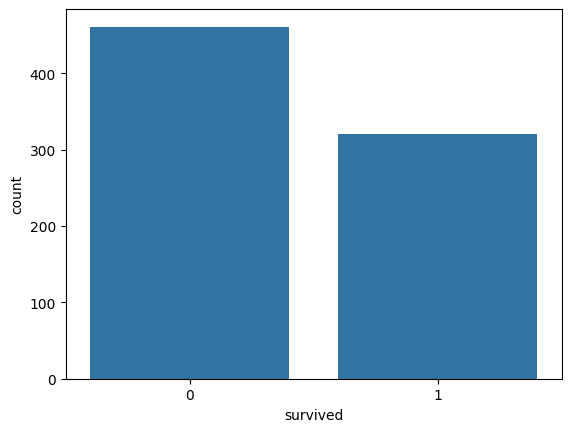

In [ ]:
# Plot frequency for column 'survied' using seaborn package
sb.countplot(x='survived', data=Titanic_clensing)

From the above graph it is shown that not many persons survived.

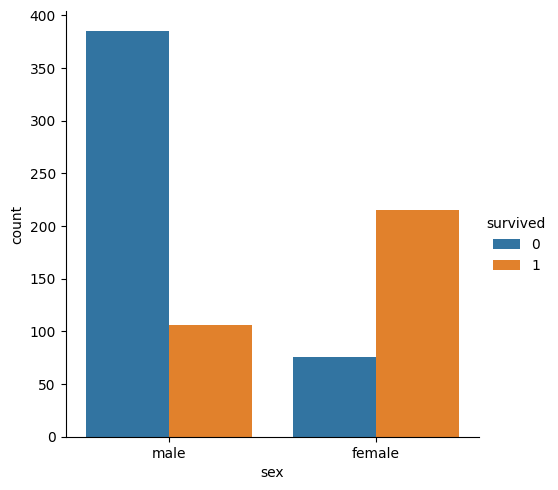

In [ ]:
sb.catplot(x ="sex", hue ="survived", kind ="count", data = Titanic_clensing)

"Whether a passenger is male or female significantly influences their likelihood of survival."

In [ ]:
# Using function groupby to calculate frequecy
Titanic_clensing.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0            76
        1           215
male    0           385
        1           106
Name: survived, dtype: int64

In [ ]:
# Using function groupby to calculate percentage
Titanic_clensing.groupby(['sex', 'survived'])['survived'].count()/Titanic_clensing.groupby(['sex'])['survived'].count()

sex     survived
female  0           0.261168
        1           0.738832
male    0           0.784114
        1           0.215886
Name: survived, dtype: float64

It is estimated that approximately 21% (106) of men survive, while around 74% (215) of women survive.

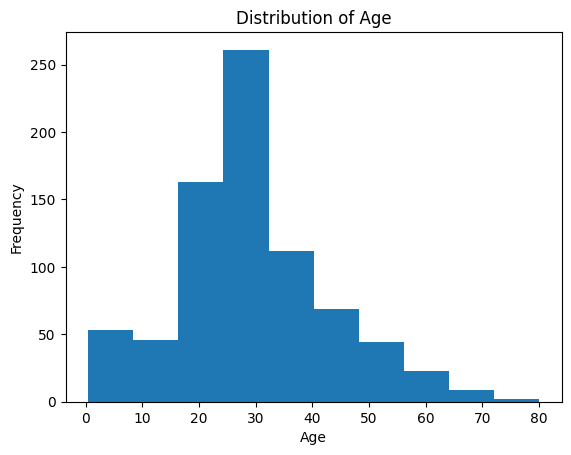

In [ ]:
# Histogram: to display the distribution of passenger ages.
plt.hist(Titanic_clensing['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Explains...

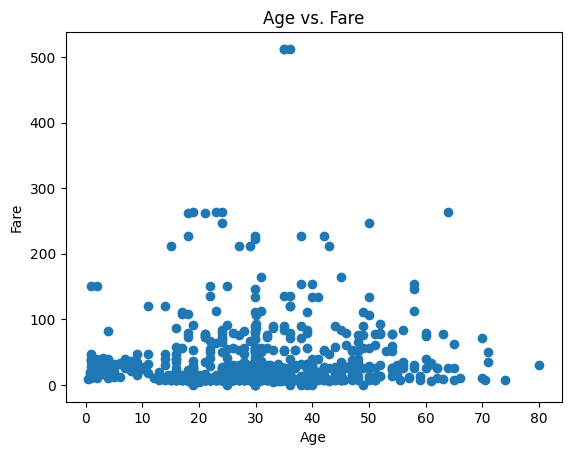

In [ ]:
# Scatter plot: to display the relationship between 'age' and 'fare'
plt.scatter(Titanic_clensing['age'], Titanic_clensing['fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare')
plt.show()

Explains...


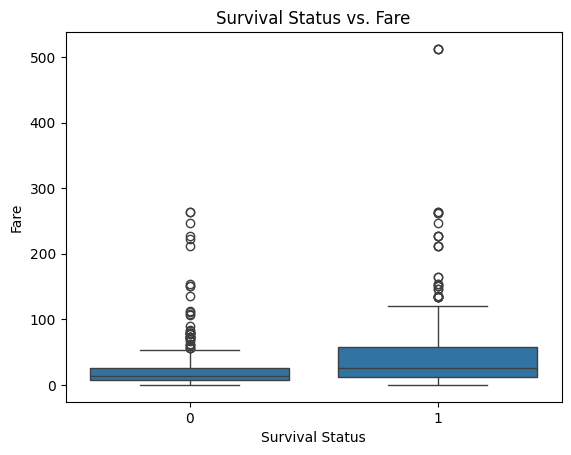

In [ ]:
# Box plot: to display the relationship between 'fare' and 'survived'
sb.boxplot(x=Titanic_clensing['survived'], y=Titanic_clensing['fare'])
plt.xlabel('Survival Status')
plt.ylabel('Fare')
plt.title('Survival Status vs. Fare')
plt.show()

Explains...


<Axes: >

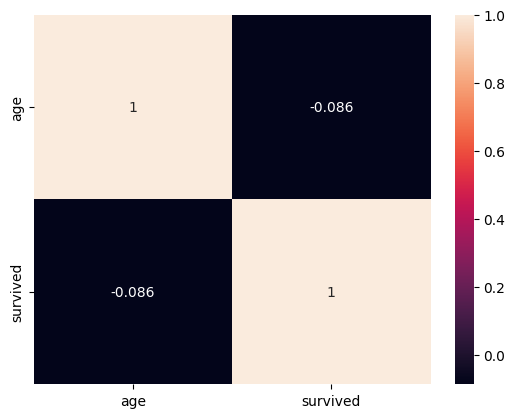

In [ ]:
# To see relationship between 'age' and 'survived' using correlation value
corr = Titanic_clensing[['age', 'survived']].corr()
sb.heatmap(corr, annot=True)

***Practice: Find correlation***
*   To see relationship between 'parch' and 'survived'
*   To see relationship between 'pclass' and 'survived'

